### Decision Tree Classifier to find the Features to Use for the Logistic Regression

In [9]:
'''from sklearn.tree import DecisionTreeClassifier
import pandas as pd

path = r'../Life_Expectancy_preprocessed_v2.csv'
data = pd.read_csv(path)
cleanData = data.dropna()

numeric_columns = ['Adult Mortality', 'infant deaths', 'Alcohol',
                   'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
                   'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
                   'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
                   'thinness 5-9 years', 'Income composition of resources', 'Schooling']
X = cleanData[numeric_columns]
y = cleanData[['Developed']]

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X, y)

feature_importances = tree_classifier.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

top_n_features = 5
selected_features = importance_df['Feature'][:top_n_features].tolist()

X_selected = X[selected_features]
'''

"from sklearn.tree import DecisionTreeClassifier\nimport pandas as pd\n\npath = r'../Life_Expectancy_preprocessed_v2.csv'\ndata = pd.read_csv(path)\ncleanData = data.dropna()\n\nnumeric_columns = ['Adult Mortality', 'infant deaths', 'Alcohol',\n                   'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',\n                   'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',\n                   'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',\n                   'thinness 5-9 years', 'Income composition of resources', 'Schooling']\nX = cleanData[numeric_columns]\ny = cleanData[['Developed']]\n\ntree_classifier = DecisionTreeClassifier(random_state=42)\ntree_classifier.fit(X, y)\n\nfeature_importances = tree_classifier.feature_importances_\n\nimportance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})\n\nimportance_df = importance_df.sort_values(by='Importance', ascending=False)\n\nprint(importance_df)\n\ntop_n_features =

### Logistic Regression and Coefficients and Intercept

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

path = '../Life_Expectancy_preprocessed_v2.csv'
data = pd.read_csv(path)
cleanData = data.dropna()

X = cleanData[['Adult Mortality','Alcohol','BMI','Schooling','thinness  1-19 years','thinness 5-9 years',
               'Income composition of resources','Total expenditure', 'infant deaths', 'percentage expenditure', 'Diphtheria', 'Measles', 'Hepatitis B', 'under-five deaths']]
y = cleanData[['Developed']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logReg = LogisticRegression()
logReg.fit(X_train,y_train)

coef = logReg.coef_
intercept = logReg.intercept_

print(f"The Coefficient for the X values are: {coef}")
print(f"The Intercept is: {intercept}")

The Coefficient for the X values are: [[-1.16255316e-02  3.19750788e-01 -1.80623092e-02  4.67616428e-02
  -1.49529796e-01 -1.46379268e-01  3.70234043e-03 -2.79635656e-02
  -3.80215869e-01  1.48121824e-04 -1.54072956e-02  1.59657058e-04
   1.17761934e-02 -5.04597074e-01]]
The Intercept is: [-0.00871764]


C:\Users\Christian Layo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Christian Layo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix and Accuracy

In [11]:
predictions = logReg.predict(X_test)

# for i, result in zip(X_test.values, predictions):
#     result_str = "Developed" if result == 1 else "Not Developed"
#     print(f"Features: {i}, Predicted result: {result_str}")

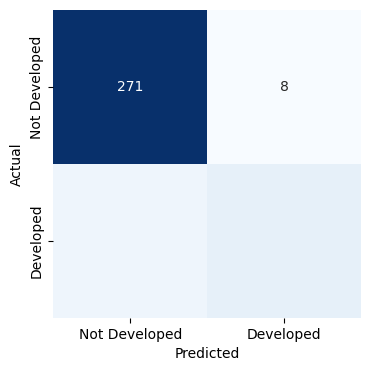

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix
cm = confusion_matrix(y_test, predictions)

# visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=['Not Developed', 'Developed'], yticklabels=['Not Developed', 'Developed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy) 

Accuracy: 0.9151515151515152


### Classification Report of Predictions

In [14]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, predictions, target_names=['Not Developed', 'Developed'])

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
                precision    recall  f1-score   support

Not Developed       0.93      0.97      0.95       279
    Developed       0.79      0.61      0.69        51

     accuracy                           0.92       330
    macro avg       0.86      0.79      0.82       330
 weighted avg       0.91      0.92      0.91       330



C:\Users\Christian Layo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


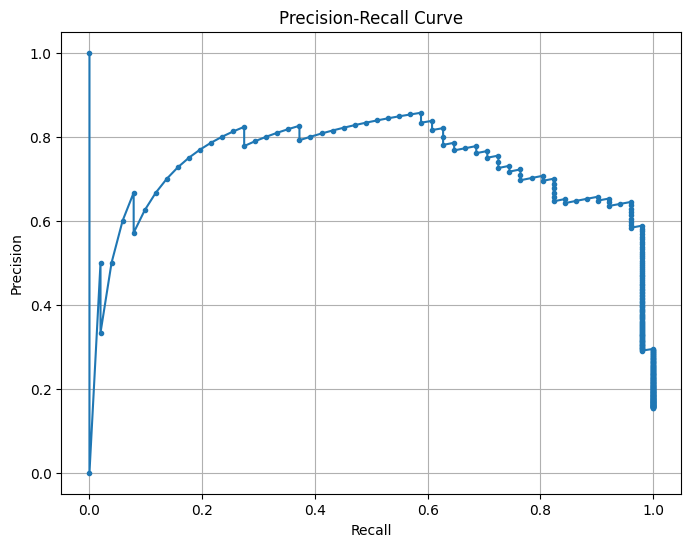

In [15]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = logReg.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

### Count of Instances for Developed or Not Developed Countries

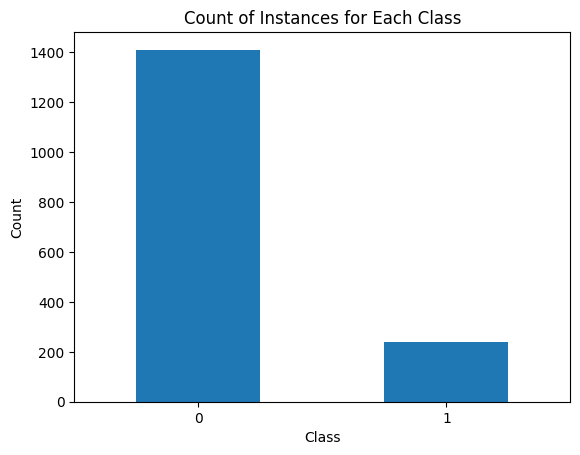

Count of Instances for Each Class:
Developed
0    1411
1     238
Name: count, dtype: int64


In [16]:
import matplotlib.pyplot as plt

class_counts = y['Developed'].value_counts()

# Create a bar plot
class_counts.plot(kind='bar')
plt.title("Count of Instances for Each Class")
plt.xticks(rotation=0)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

class_counts = y['Developed'].value_counts()

print("Count of Instances for Each Class:")
print(class_counts)